# CREDIT SCORING MODEL FOR PREDICTING LOAN DEFAULTERS

## 1. BUSINESS UNDERSTANDING

#### a) PERSPECTIVE

Credit scoring is a crucial process financial institutions employ to evaluate the probability of an applicant defaulting on a loan. This process enables lenders to make well-informed decisions regarding loan approval and lending terms. By analyzing various factors, financial institutions can estimate the applicant's creditworthiness, reducing the risk of bad loans and ensuring more accurate, data-driven lending decisions.

Machine learning models, particularly those for binary classification, play a significant role in predicting the likelihood of default to enhance decision-making. Logistic regression is commonly used for such tasks, but other models, like decision trees and random forests, can be considered to understand better the factors that predict default risk.

#### b) OBJECTIVES

The main objective of this project is to develop a predictive model that estimates the probability of loan default based on demographic and financial attributes. These attributes include:

1. Age

2. Sex

3. Job

4. Housing status

5. Savings and checking account balance

6. Credit amount

8. Loan duration

9. Loan purpose

The target variable in this project is **defaulter**, a binary classification that indicates whether an applicant has defaulted on a loan (bad) or not (good). This model aims to:

• Apply **logistic regression** as the primary method to handle the binary classification task.

• Consider additional machine learning models like **decision trees** and **random forests** to identify key predictors of default behaviour.

• Enable financial institutions to minimize the risk of bad loans through data-driven insights and more precise loan approval decisions.

Relevant objectives include

• Improving accuracy in predicting defaults

• Refining decision-making processes

• Expanding the analysis with multiple models to ensure robustness in prediction.


In [7]:
import pandas as pd
import numpy as np

## 2. DATA UNDERSTANDING

In [8]:
Data = pd.read_csv("/german_credit_data.csv")
Data.head()

,Number,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
Data.info()
Data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Number            1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  defaulter         1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,Number,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [10]:
Data.dtypes

,0
Number,int64
Age,int64
Sex,object
Job,int64
Housing,object
Saving accounts,object
Checking account,object
Credit amount,int64
Duration,int64
Purpose,object


## 3. DATA CLEANING

In [11]:
#Removing duplicates
Data.drop_duplicates(inplace = True)
Data.head(8)

,Number,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good


In [12]:
Data.isna().any()

,0
Number,False
Age,False
Sex,False
Job,False
Housing,False
Saving accounts,True
Checking account,True
Credit amount,False
Duration,False
Purpose,False


In [13]:
#Unwanted Variables
#make numbers to be the set index
Data.set_index("Number", inplace=True)
Data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
Number,,,,,,,,,,
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [14]:
#missing values for non-numerics
#The lambda function applies the mode function to each non-numeric column and returns the most frequent value.
Data.fillna(Data.select_dtypes(exclude=np.number).apply(lambda x: x.mode()[0]), inplace=True)
Data.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
Number,,,,,,,,,,
786,40,male,2,own,quite rich,little,2675,22,radio/TV,good
154,36,male,3,rent,moderate,moderate,6967,24,business,good
40,30,male,3,own,quite rich,little,2333,30,radio/TV,good
567,34,male,2,own,rich,little,2578,24,radio/TV,good
63,25,male,2,own,little,moderate,14421,48,business,bad
386,21,female,2,rent,little,little,1126,18,radio/TV,good
986,33,male,2,own,little,rich,6289,42,business,good
57,31,female,2,own,little,little,9566,36,radio/TV,good
132,27,male,1,own,little,little,2708,15,furniture/equipment,good


In [15]:
numeric_cols = Data.select_dtypes(include=['number']).columns
# Function to detect outliers using IQR
def detect_outliers(Data, columns):
    outliers = {}
    for col in columns:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)][col]
    return outliers

# Check for outliers in numerical columns
outliers_dict = detect_outliers(Data, numeric_cols)

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

# Drop rows with outliers from the data DataFrame
data = Data[~((Data[numeric_cols] < (Data[numeric_cols].quantile(0.25) - 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25)))) |
               (Data[numeric_cols] > (Data[numeric_cols].quantile(0.75) + 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25))))).any(axis=1)]

# Print the final DataFrame after dropping outliers
print("Final DataFrame after dropping outliers:")
print(data.head(30))

Outliers in Age:
Number
0      67
75     66
137    66
163    70
179    65
186    74
187    68
213    66
330    75
430    74
438    65
536    75
554    67
606    74
624    65
723    66
756    74
774    66
779    67
807    65
846    68
883    65
917    68
Name: Age, dtype: int64


Outliers in Job:
Number
2      1
5      1
7      3
8      1
9      3
      ..
991    1
992    1
993    3
995    1
996    3
Name: Job, Length: 370, dtype: int64


Outliers in Credit amount:
Number
5       9055
17      8072
18     12579
57      9566
63     14421
       ...  
927    10297
945     8358
953    10974
980     8386
983     8229
Name: Credit amount, Length: 72, dtype: int64


Outliers in Duration:
Number
1      48
11     48
29     60
35     45
36     48
       ..
945    48
973    60
981    48
998    45
999    45
Name: Duration, Length: 70, dtype: int64


Final DataFrame after dropping outliers:
        Age     Sex  Job Housing Saving accounts Checking account  \
Number                                   

## 4. DATA VISUAIZATION

#### a) UNIVARIATE ANALYSIS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

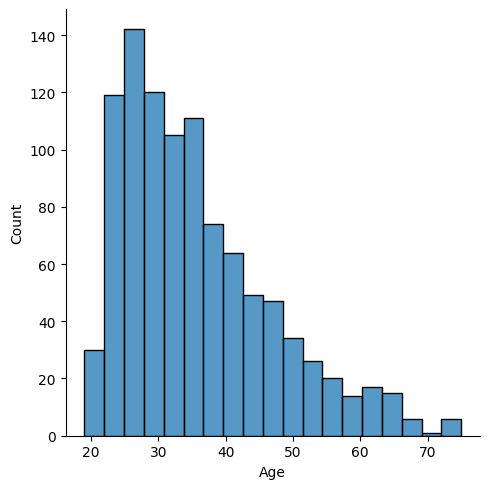

In [17]:
# exploring the age variable
sns.displot(Data['Age']);

*Most individuals in the dataset are younger*, with their ages concentrated around a lower range (e.g., between 20 and 40).

*Fewer individuals are older*, and as age increases beyond the mean or median, the number of observations decreases significantly, reflected in the long tail on the right side of the distribution.

Text(0.5, 1.0, 'Distribution of Credit Amount')

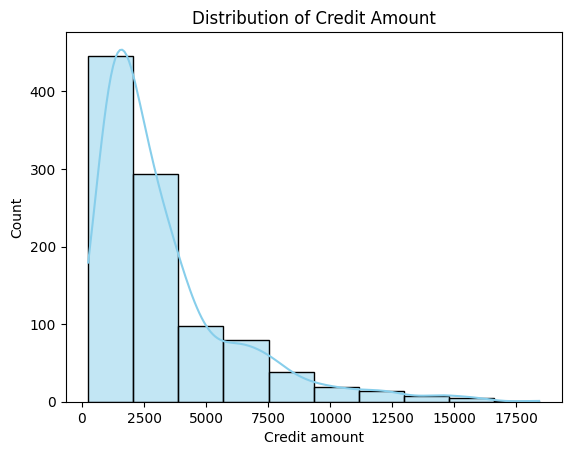

In [18]:
#showing distribution of credit amount
sns.histplot(Data['Credit amount'], bins=10, kde=True, color='skyblue')

plt.title('Distribution of Credit Amount')

Text(0.5, 1.0, 'Distribution of Age')

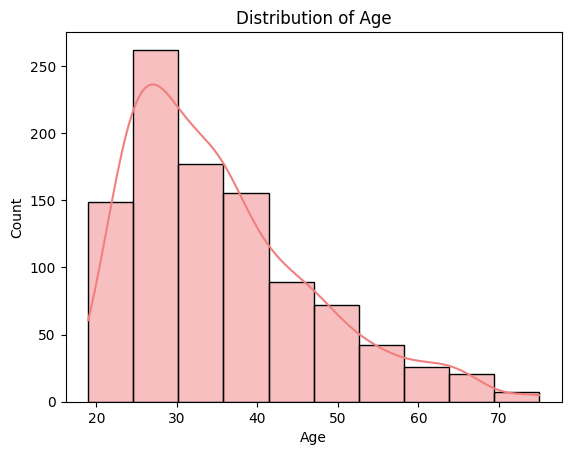

In [19]:
#Showing the age distribution
sns.histplot(Data['Age'], bins=10, kde=True, color='lightcoral')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Applicants by Sex')

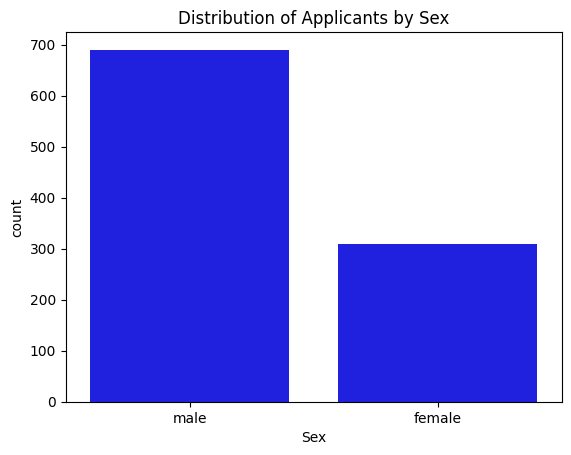

In [20]:
#Gender distribution
sns.countplot(x=Data["Sex"], color = "blue")

plt.title('Distribution of Applicants by Sex')

 Males are the majority in taking loans.

<ipython-input-21-5d3ae0df9b87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Data['Saving accounts'], palette = "icefire_r")


Text(0.5, 1.0, 'Distribution of Savings Accounts Balance')

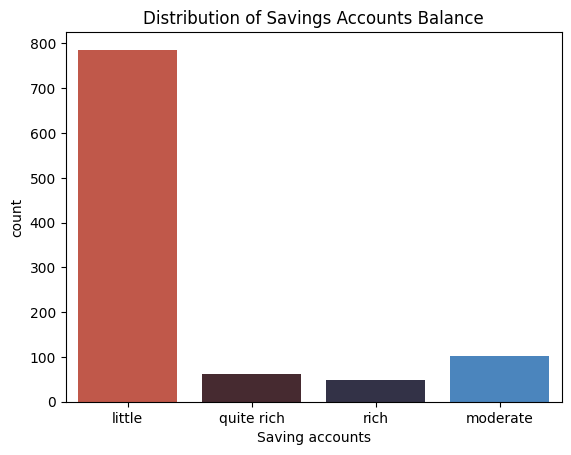

In [21]:
sns.countplot(x=Data['Saving accounts'], palette = "icefire_r")

plt.title('Distribution of Savings Accounts Balance')

Those with a "little" savings status have the highest number of credit loans, while the number of loans decreases as the savings status moves towards "rich". That indicates that those with little to moderate savings have a higher default rate based on the potential link between savings habits and default risk.

<ipython-input-22-d18a3d7eb6cd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Data['Housing'], palette = "hot_r")


Text(0.5, 1.0, 'Housing Distribution')

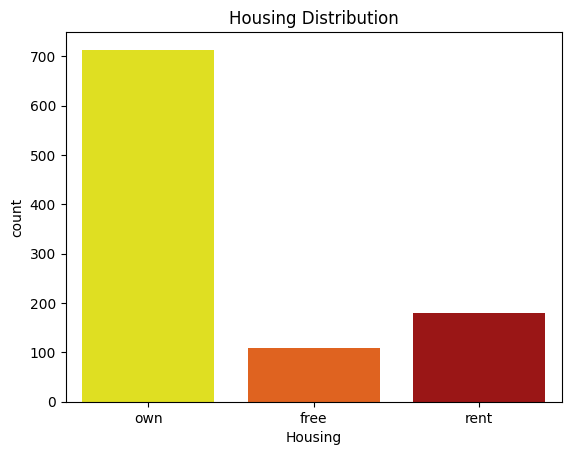

In [22]:
sns.countplot(x=Data['Housing'], palette = "hot_r")

plt.title('Housing Distribution')

Based on the housing data, it is evident that those who own their own homes have the highest number of credit bank loans, with approximately 700 customers, followed by rent with approximately ± 200, and free housing with ± 100.

#### b) BIVARIATE ANALYSIS

In [23]:
data = Data
print(data.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'defaulter'],
      dtype='object')


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'radio/TV'),
  Text(1, 0, 'education'),
  Text(2, 0, 'furniture/equipment'),
  Text(3, 0, 'car'),
  Text(4, 0, 'business'),
  Text(5, 0, 'domestic appliances'),
  Text(6, 0, 'repairs'),
  Text(7, 0, 'vacation/others')])

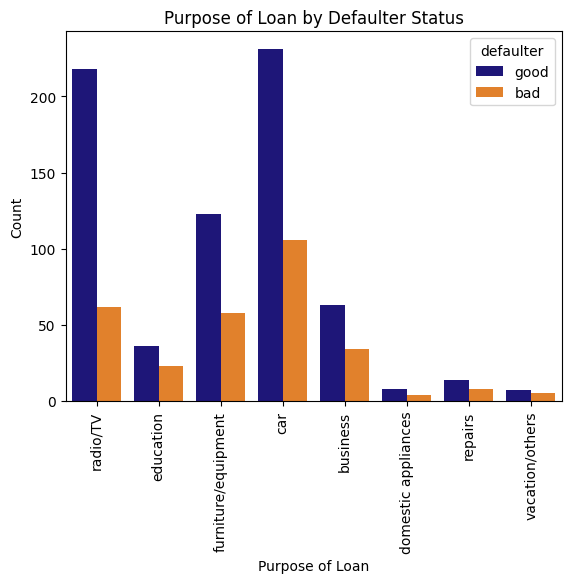

In [24]:
#Purpose of loan
sns.countplot(x='Purpose', hue='defaulter', data=Data, palette=['#100688', '#ff7f0e'])
plt.title('Purpose of Loan by Defaulter Status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count')
plt.xticks(rotation=90)

Loans for liability assets like cars, furniture, and electronics often have higher default rates because these items depreciate and don’t generate income, making repayment harder, especially for those with unstable incomes. In contrast, business loans tend to have lower default rates, as they are seen as investments that generate future income, motivating timely repayment. Vacation loans, while non-essential, usually have low default rates due to their smaller amounts and shorter repayment terms, making them easier for borrowers who want to maintain good credit.

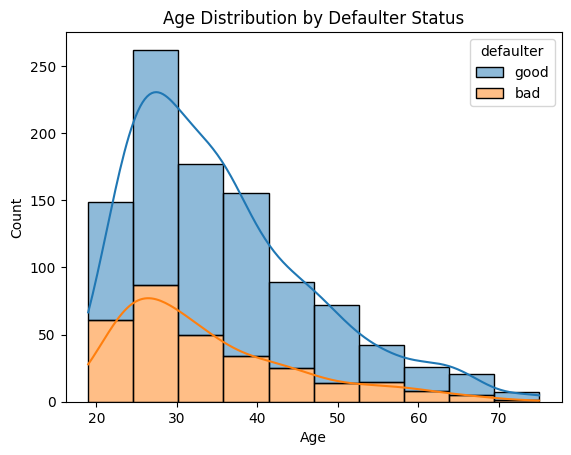

In [25]:
#Age distribution
sns.histplot(data=Data, x='Age', hue='defaulter', multiple='stack', bins=10, kde=True)

plt.title('Age Distribution by Defaulter Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

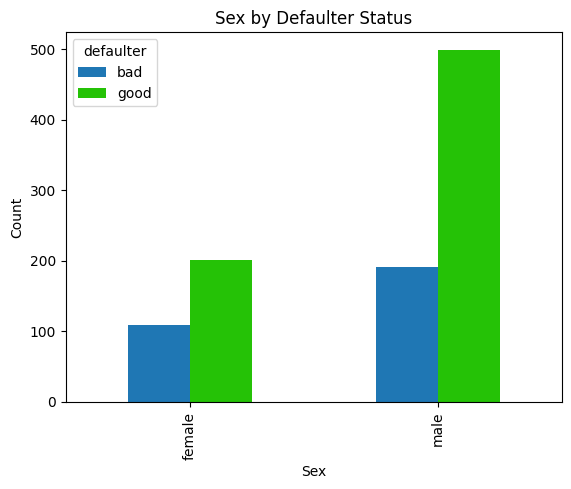

In [26]:
#Gender by defaulter status
loan_purpose = Data.groupby(['Sex', 'defaulter']).size().unstack()
loan_purpose.plot(kind='bar', color=['#1f77b4', '#25c206'])
plt.title('Sex by Defaulter Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'little'),
  Text(1, 0, 'quite rich'),
  Text(2, 0, 'rich'),
  Text(3, 0, 'moderate')])

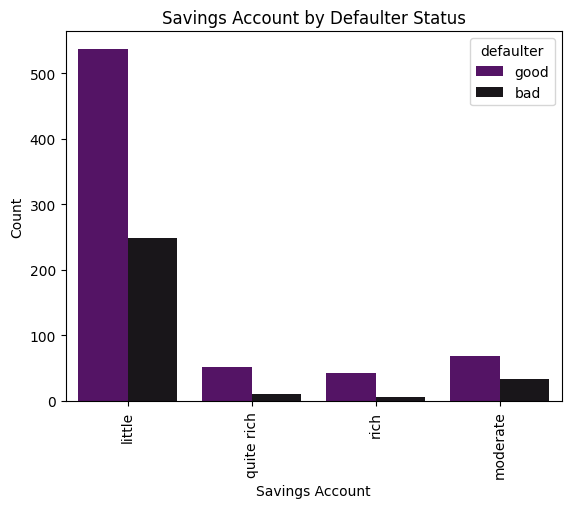

In [27]:
#Savings account by defaulter status
sns.countplot(x='Saving accounts', hue='defaulter',data = Data, palette=['#5c0673', '#19161a'])
plt.title('Savings Account by Defaulter Status')
plt.xlabel('Savings Account')
plt.ylabel('Count')
plt.xticks(rotation=90)

Little to moderate savings account have higher rate of defaulting compared to quite rich and rich

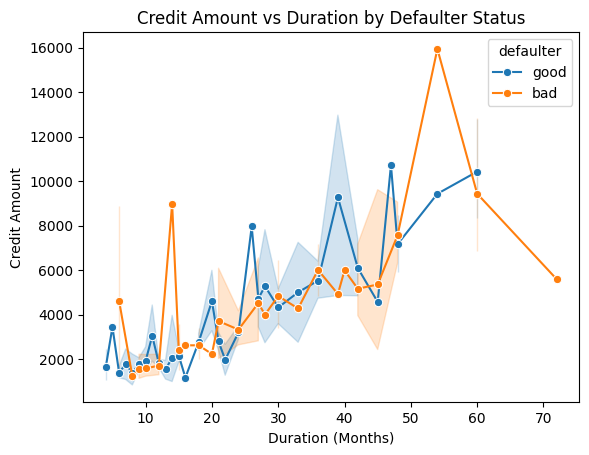

In [28]:
#line plot of Duration vs. Credit Amount
sns.lineplot(data=Data, x='Duration', y='Credit amount', hue='defaulter', marker='o')

plt.title('Credit Amount vs Duration by Defaulter Status')
plt.xlabel('Duration (Months)')
plt.ylabel('Credit Amount')
plt.show()

## 5. CORRELATION

In [29]:
data['defaulter'] = data['defaulter'].map({'good': 0, 'bad': 1})
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
Number,,,,,,,,,,
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,little,804,12,radio/TV,0


In [30]:
#preprocessing the species column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Housing'] = le.fit_transform(data['Housing'])
data['Saving accounts'] = le.fit_transform(data['Saving accounts'])
data['Checking account'] = le.fit_transform(data['Checking account'])
data['Purpose'] = le.fit_transform(data['Purpose'])
data['defaulter']=le.fit_transform(data['defaulter'])

data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,defaulter
Number,,,,,,,,,,
0,67,1,2,1,0,0,1169,6,5,0
1,22,0,2,1,0,1,5951,48,5,1
2,49,1,1,1,0,0,2096,12,3,0
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,1


Features such as Sex, Housing, Saving accounts, Checking account, and Purpose were categorical. These were encoded using one-hot encoding to convert them into numerical representations for the model.

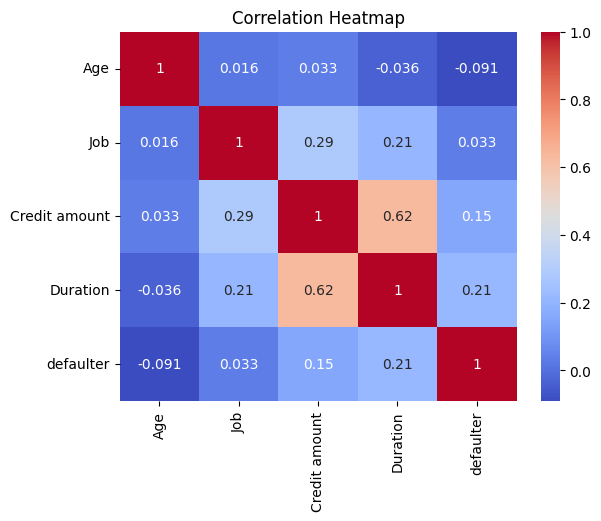

In [31]:
corr = data[['Age', 'Job', 'Credit amount', 'Duration', 'defaulter']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Correlation close to 1 is a strong correlation ,while correlation close to -1 is a weak relationship and correlation equal to zero is no relationship.

## 7. DATA MODELLING

##### The three main models tested were:

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

##### Technique Selected:

***Logistic Regression*** was chosen as the final model for the following reasons:

• Logistic Regression provided a good balance of interpretability and performance with an accuracy of 72% on the test set.

• It outputs probabilities, which are essential for credit scoring to give confidence levels about whether an individual will default.

• The confusion matrix and classification report showed reasonable precision and recall for the non-defaulter class (though improvement is needed for defaulter prediction).

#### a) LOGISTIC REGRESSION

In [32]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
#defining predictor variables and target variable
X=data.drop('defaulter',axis=1)
y=data.defaulter

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### Predicting the test set results and calculating the accuracy

In [35]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


##### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[203  11]
 [ 74  12]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       214
           1       0.52      0.14      0.22        86

    accuracy                           0.72       300
   macro avg       0.63      0.54      0.52       300
weighted avg       0.67      0.72      0.65       300



### ALTERNATIVE MODEL

#### a) DECISION TREES

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [39]:
X = data.drop(columns = ['defaulter'])
y = data.defaulter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
# Initialize DecisionTreeClassifier and fit the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [41]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       209
           1       0.36      0.32      0.34        91

    accuracy                           0.62       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.61      0.62      0.62       300



#### b) RANDOM FOREST

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [44]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [46]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predictions
y_pred = rf_model.predict(X_test)

In [48]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       141
           1       0.46      0.19      0.27        59

    accuracy                           0.69       200
   macro avg       0.59      0.55      0.54       200
weighted avg       0.65      0.69      0.65       200



## 7. CONCLUSION

The ***logistic regression*** model provided a reasonable prediction accuracy of 72%, although it struggled with recall for defaulters, achieving only 13%. This may be due to class imbalance.

The ***Random Forest*** and ***Decision Tree*** models were also tested but did not outperform logistic Regression significantly. However, Random Forest did show promise in capturing the defaulter class more accurately than other models.

### **Summary of Model Performance:**

###### 1. **Logistic Regression:**

• Accuracy: 72%

• Precision (Defaulter): 52%, Recall (Defaulter): 13%

###### 2. **Decision Tree:**

• Accuracy: 62%

• Precision (Defaulter): 36%, Recall (Defaulter): 32%

###### 3. **Random Forest:**
   
• Accuracy: 69%

• Precision (Defaulter): 46%, Recall (Defaulter): 19%

## 8. RECOMMENDATIONS

1. Use Ensemble Methods:
Methods like Random Forest or Gradient Boosting could improve performance by reducing variance and capturing more complex patterns.